#Traffic Volume Prediction using supervised machine learning

In [13]:
!git clone https://github.com/Sapphire-Moon/shestem-assignment.git
%cd shestem-assignment

Cloning into 'shestem-assignment'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 9 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), done.
Resolving deltas: 100% (2/2), done.
/content/shestem-assignment


Kaggle dataset url: https://www.kaggle.com/datasets/fedesoriano/traffic-prediction-dataset

#Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

#Data Import & Preprocessing

In [4]:
# Load the dataset
file_path = 'traffic.csv'
df = pd.read_csv(file_path)

# Display first 10 rows of the dataset
df.head(10)

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
5,2015-11-01 05:00:00,1,6,20151101051
6,2015-11-01 06:00:00,1,9,20151101061
7,2015-11-01 07:00:00,1,8,20151101071
8,2015-11-01 08:00:00,1,11,20151101081
9,2015-11-01 09:00:00,1,12,20151101091


In [5]:
print("Rows:", df.shape[0], " Columns:", df.shape[1])
df.head()

Rows: 48120  Columns: 4


,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [8]:
#Analyzing the dataset
display(df.describe())

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


*The information about the dataset shows there is no null value in the dataset, but the 'DateTime' column needs data type modification.*

In [11]:
#Missing values check
df.isnull().sum()

,0
DateTime,0
Junction,0
Vehicles,0
ID,0


*There are no missing values in the columns. Now proceeding to change the datatype.*

In [12]:
#Data type change
df['DateTime'] = pd.to_datetime(df['DateTime'])

*Extracting features such as; Hour, Day_of_Week, Weekend columns from the DateTime column for better analysis.*

In [ ]:
#Hour, Day of Week, and Weekend indicator
df['Hour'] = df['DateTime'].dt.hour
df['Year'] = df['DateTime'].dt.year
df['Day_of_Week'] = df['DateTime'].dt.dayofweek
df['Weekend'] = df['Day_of_Week'].apply(lambda day: 1 if day>=5 else 0)
df.head(10)

,DateTime,Junction,Vehicles,ID,Hour,Year,Day_of_Week,Weekend
0,2015-11-01 00:00:00,1,15,20151101001,0,2015,6,1
1,2015-11-01 01:00:00,1,13,20151101011,1,2015,6,1
2,2015-11-01 02:00:00,1,10,20151101021,2,2015,6,1
3,2015-11-01 03:00:00,1,7,20151101031,3,2015,6,1
4,2015-11-01 04:00:00,1,9,20151101041,4,2015,6,1
5,2015-11-01 05:00:00,1,6,20151101051,5,2015,6,1
6,2015-11-01 06:00:00,1,9,20151101061,6,2015,6,1
7,2015-11-01 07:00:00,1,8,20151101071,7,2015,6,1
8,2015-11-01 08:00:00,1,11,20151101081,8,2015,6,1
9,2015-11-01 09:00:00,1,12,20151101091,9,2015,6,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DateTime     48120 non-null  datetime64[ns]
 1   Junction     48120 non-null  int64         
 2   Vehicles     48120 non-null  int64         
 3   ID           48120 non-null  int64         
 4   Hour         48120 non-null  int32         
 5   Year         48120 non-null  int32         
 6   Day_of_Week  48120 non-null  int32         
 7   Weekend      48120 non-null  int64         
dtypes: datetime64[ns](1), int32(3), int64(4)
memory usage: 2.4 MB


*Normalization of numerical feature such as; Vehicle is necessary. Since, too many variation in scale of values will dominate the learning process of models, making the other features less considerable to the model, which might result in less accuracy. Min-Max scaling transforms the feature to a specified range, usually between 0 and 1.*

In [ ]:
from sklearn.preprocessing import MinMaxScaler
normalization_scaler = MinMaxScaler()
df[['Vehicles']] = normalization_scaler.fit_transform(df[['Vehicles']])
df.head(10)

,DateTime,Junction,Vehicles,ID,Hour,Year,Day_of_Week,Weekend
0,2015-11-01 00:00:00,1,0.078212,20151101001,0,2015,6,1
1,2015-11-01 01:00:00,1,0.067039,20151101011,1,2015,6,1
2,2015-11-01 02:00:00,1,0.050279,20151101021,2,2015,6,1
3,2015-11-01 03:00:00,1,0.033520,20151101031,3,2015,6,1
4,2015-11-01 04:00:00,1,0.044693,20151101041,4,2015,6,1
5,2015-11-01 05:00:00,1,0.027933,20151101051,5,2015,6,1
6,2015-11-01 06:00:00,1,0.044693,20151101061,6,2015,6,1
7,2015-11-01 07:00:00,1,0.039106,20151101071,7,2015,6,1
8,2015-11-01 08:00:00,1,0.055866,20151101081,8,2015,6,1
9,2015-11-01 09:00:00,1,0.061453,20151101091,9,2015,6,1


#Exploratory Data Analysis

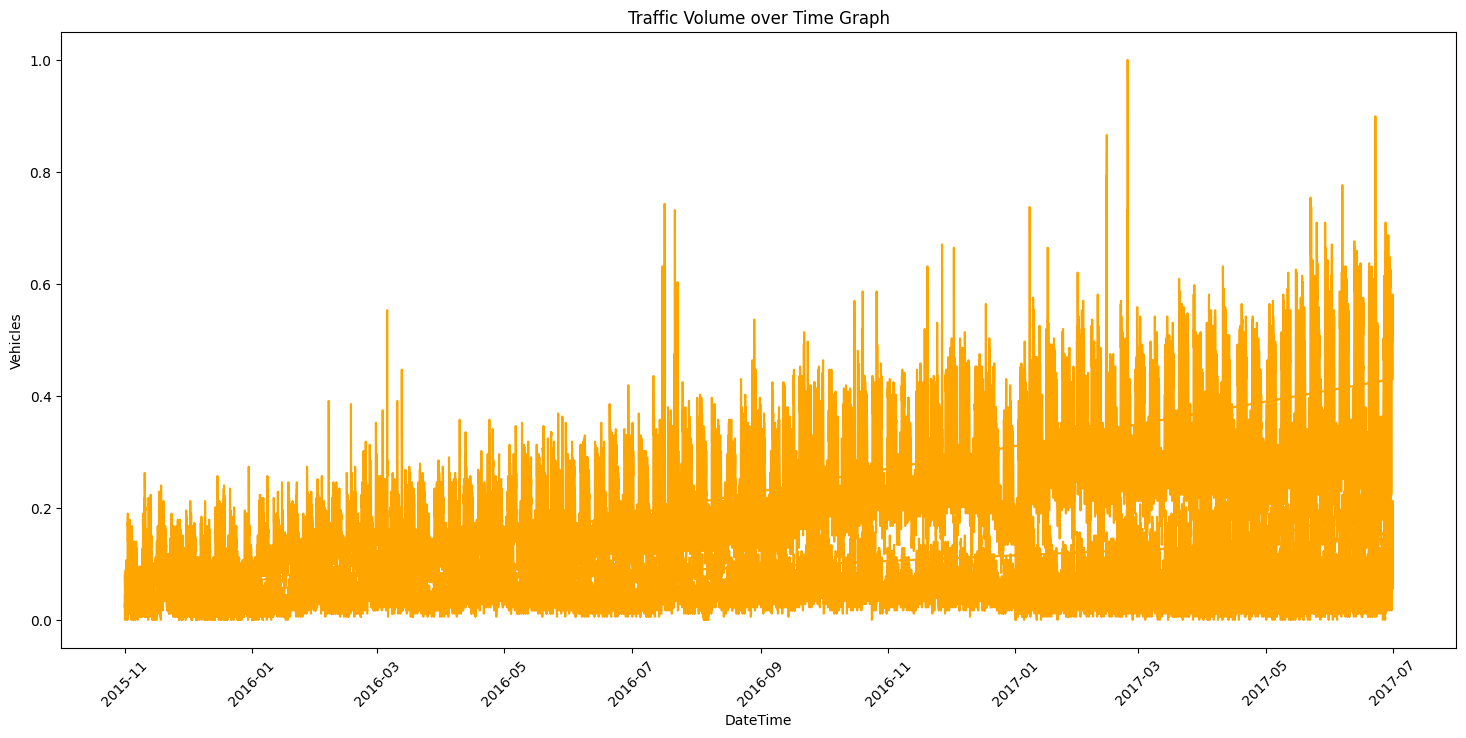

In [ ]:
#Line plot Traffic volume (Vehicles) over Time
plt.figure(figsize=(18,8))
plt.plot(df['DateTime'],df['Vehicles'], color='orange')
plt.xlabel('DateTime')
plt.ylabel('Vehicles')
plt.xticks(rotation=45)
plt.title('Traffic Volume over Time Graph')
plt.show()

In [ ]:
#Average traffic volume by Hour and Weekdays
hourly_average = df.groupby('Hour')['Vehicles'].mean()
display(hourly_average)

,Vehicles
Hour,
0,0.125925
1,0.104217
2,0.089959
3,0.077360
4,0.066889
5,0.062422
6,0.066928
7,0.076554
8,0.086050


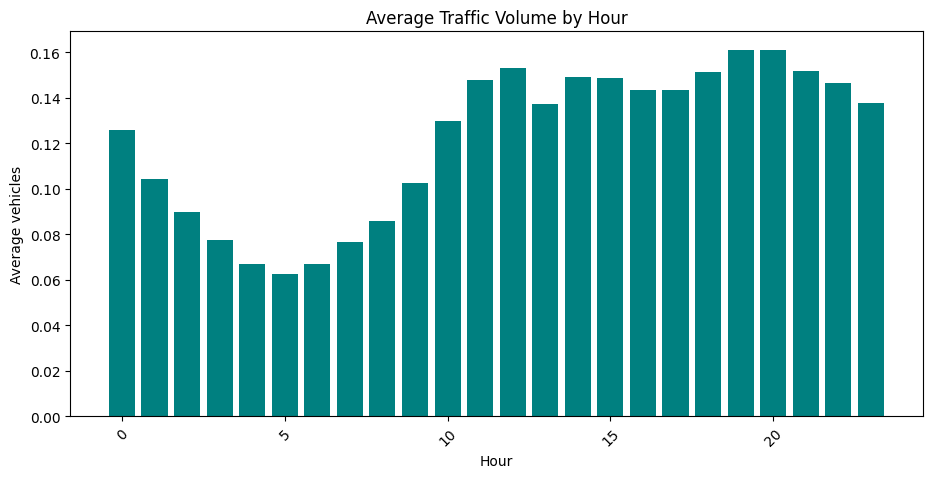

In [ ]:
#Bar plot on Average traffic volume by Hour and Weekdays
plt.figure(figsize=(11,5))
plt.bar(hourly_average.index, hourly_average.values, color='teal')
plt.xlabel('Hour')
plt.ylabel('Average vehicles')
plt.title('Average Traffic Volume by Hour')
plt.xticks(rotation=45)
plt.show()

*Average Traffic Volume vs Hour graph shows that most rush hours are 12, 18, 19, 20, 21; which means 12pm, 7-9pm are the rush hours.*

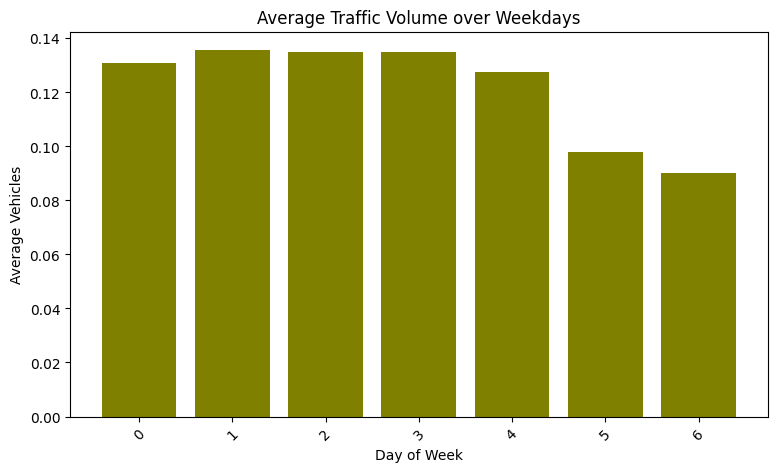

In [ ]:
#Bar plot on Average traffic volume over Weekdays
weekday_average = df.groupby('Day_of_Week')['Vehicles'].mean()

plt.figure(figsize=(9,5))
plt.bar(weekday_average.index, weekday_average.values, color='olive')
plt.xlabel('Day of Week')
plt.ylabel('Average Vehicles')
plt.title('Average Traffic Volume over Weekdays')
plt.xticks(rotation=45)
plt.show()

*This bar plot shows on weekdays the rush a bit higher than the holidays.*

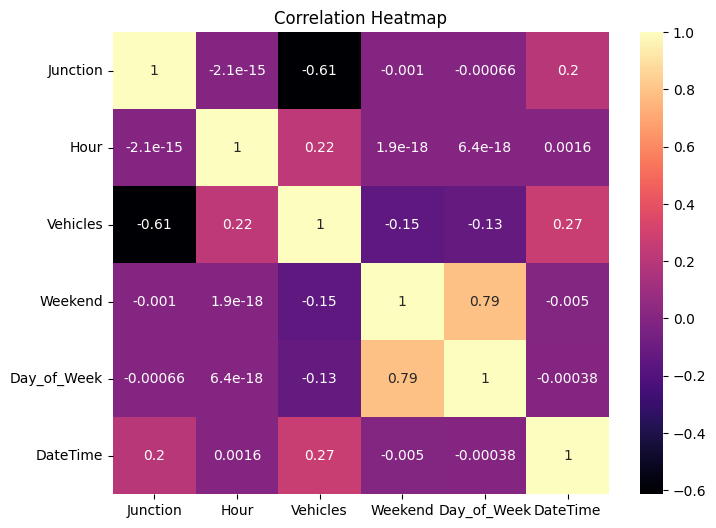

In [ ]:
#Heatmap for correlation analysis
correlation_matrix = df[['Junction', 'Hour', 'Vehicles', 'Weekend', 'Day_of_Week', 'DateTime']].corr()
plt.figure(figsize=(8,6))
sn.heatmap(correlation_matrix, annot = True, cmap = 'magma')
plt.title('Correlation Heatmap')
plt.show()

*The -0.61 correlation between Junction and Vehicles shows a strong negative correlation. This suggests that certain junctions consistently have fewer/more vehicles. Vehicles and DateTime show a weak positive correlation. Traffic slightly increases based on rush hours during working days. Not very strong but still valuable insight for feature selection.*

#Model Building & Evaluation

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['Junction', 'Hour', 'Weekend', 'Day_of_Week']]
y =df['Vehicles']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (38496, 4)
X_test shape: (9624, 4)


*To train and test dataset the selected features are: Junction, Hour, Weekend, Day_of_Week*

Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#Prediction
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mse_lr**0.5
r2_lr = r2_score(y_test, y_pred_lr)

print(rmse_lr)
print(r2_lr)

0.08374114067693786
0.44867665953518376


*In regression models, root mean squared error and R^2 score is used for model performance evaluation. While in classification models accuracy, precision, f1score and recall are used as metrics to evaluate the model.*

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#Prediction
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf**0.5
r2_rf = r2_score(y_test, y_pred_rf)

print(rmse_rf)
print(r2_rf)

0.0639301131260319
0.6786786521077083


***Model Evaluation:***
*Linear Regression gained RMSE score of about 0.084 and R^2 score of 0.448; A lower RMSE suggests a better fit and good predictability of the model with actual values. And R^2 0.4486 means the model can explain 44.86% variance in the target variable Vehicles. While comparing with Linear Regressor, the RMSE and R^2 score both improved in case of Random Forest model. RMSE value 0.063 shows it fits better and performs better prediction than Linear Regression. Again, R^2 score 0.6786 shows the model can explain target variable variance by 67.86%.*

#Code Analysis & Interpretation

In [ ]:
# Predict traffic volume for top 3 hours using RF model
predicted_traffic = rf_model.predict(X)
df['Predicted traffic'] = predicted_traffic
top_hours = df.groupby('Hour')['Predicted traffic'].mean().sort_values(ascending=False).head(3)
print("Top 3 hours with the highest predicted traffic:", top_hours)

Top 3 hours with the highest predicted traffic: Hour
19    0.161905
20    0.158681
12    0.154570
Name: Predicted traffic, dtype: float64


*By grouping the dataset based on hour and predicted traffic, and sorting the values in descending order, we can find out the top 3 rush hours.*

       Feature  Importance
0     Junction    0.740361
1         Hour    0.176018
3  Day_of_Week    0.045180
2      Weekend    0.038442


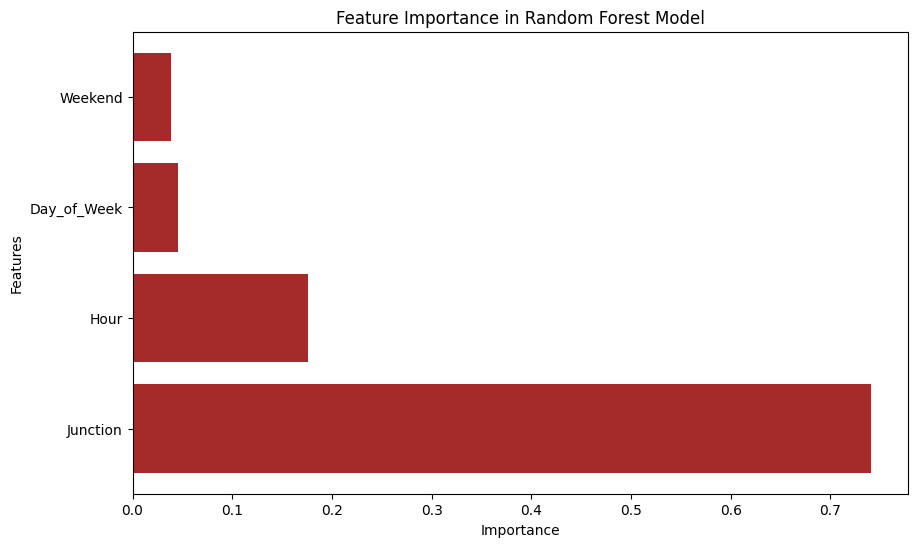

In [ ]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

#The feature importances
print(importances)

plt.figure(figsize=(10, 6))
plt.barh(importances['Feature'], importances['Importance'], color='brown')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


*The feature importance shows, the highest impactful feature is the Junction, and secondly Hour. The least impactful is Weekend and Day_of_Week features. This means location and time are the main drivers of traffic patterns.*

In [ ]:
#Difference between actual and predicted values
df['Predicted_Vehicles'] = rf_model.predict(X)
df['Residuals'] = df['Vehicles'] - df['Predicted_Vehicles']

#largest prediction error
max_error = df.iloc[df['Residuals'].abs().idxmax()]

print("Instance with the highest prediction error:")
print(max_error)

Instance with the highest prediction error:
DateTime              2017-02-23 19:00:00
Junction                                3
Vehicles                              1.0
ID                            20170223193
Hour                                   19
Year                                 2017
Day_of_Week                             3
Weekend                                 0
Predicted traffic                0.119333
Predicted_Vehicles               0.119333
Residuals                        0.880667
Name: 40723, dtype: object


*The differences between the actual values and the predicted values are stored in residuals. By using abs() function we change the negatively deviated values to positive for better comparison with the actual ones. And the idcmax() function helps us to find the maximum deviation value index. And using the iloc[...] we address the complete row containing the maximum deviation value index. Using the above we found that the highest deviation from actual value was 0.88; In the entry with ID 20170223193, where the date was 23 Feb,2017, during 7pm and weekday 3.*

#Reflection & Learning

*The model detected strong correlations between junction location and traffic volume. It shows that certain junctions consistently experience higher or lower traffic. It also learned how Hour and day type Weekend vs Weekday influence congestion, such as; higher volumes during midday and evening rush hour. It showed reduced traffic on weekends.*

*From this exercise, I realized that traffic really follows predictable cycles. For example, lunchtime and evening rush are always busy, while weekends are calmer. When I looked at feature importance, I noticed that the junction and the hour of the day matter the most, while weekday/weekend is not as strong. I also noticed how Random Forest performed way better than Linear Regression, which indicates how much the choice of model can affect the results.*

#Real-World Analogy & Critical Thinking

*If a city traffic planner used this model, they could prepare ahead for busy hours. For example, if the model predicts heavy traffic at 8 AM on a Wednesday, the city could adjust signal timings accordingly, assign more officers, or guide drivers to alternative routes. That way, instead of reacting to traffic after it happens, they can manage it before it gets out of hand.*

***Manual observation vs model predictions:***
*Looking at charts and averages only shows general trends, like “evenings are busy.” But the model can give exact predictions for specific times and conditions, for example: junction location where rush could occur, timing and day as well. That’s more powerful because it combines many factors together, so the predictions are sharper and more useful for decision-making.*

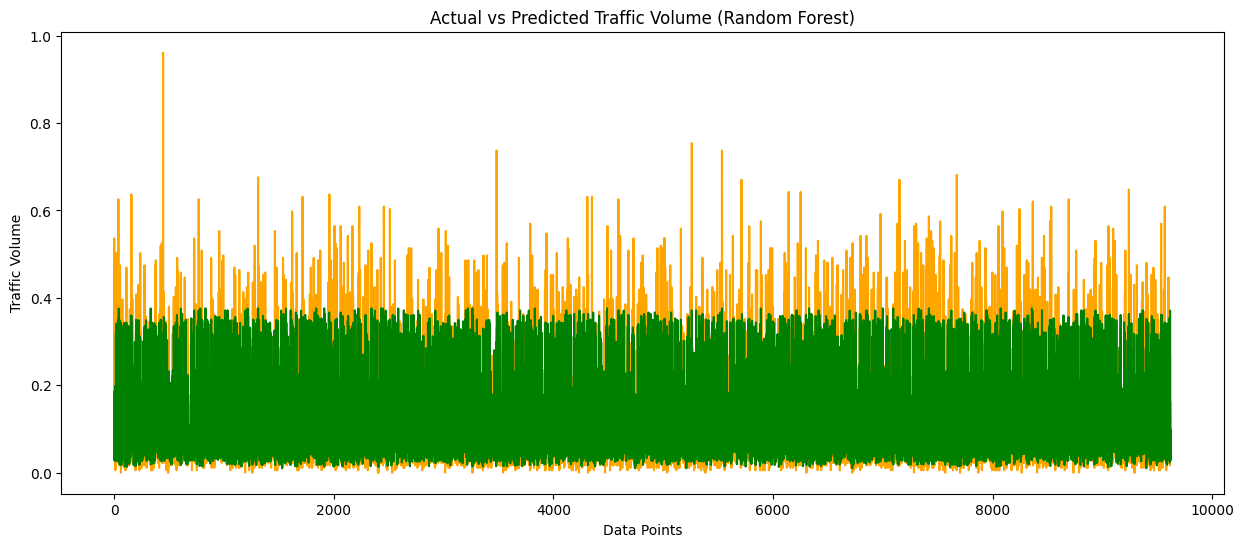

In [ ]:
#Plotting actual vs predicted traffic volumes for the test set
plt.figure(figsize=(15, 6))
plt.plot(y_test.values, label='Actual Volume', color='orange')
plt.plot(y_pred_rf, label='Predicted Volume', color='green')
plt.title('Actual vs Predicted Traffic Volume (Random Forest)')
plt.xlabel('Data Points')
plt.ylabel('Traffic Volume')
plt.show()


*The plot of actual vs predicted traffic shows that the Random Forest model can predict the real traffic trend quite well, though there are still some gaps. The results confirm that traffic really spikes around midday and evenings. Junction is the biggest factor in predicting volume. For planners, this helps as they can spot the busiest spots and times in advance and use the predictions to improve road planning, signal timings, or even public transport schedules.*